In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.0 Data Collection

In [2]:
#load the data set
df = pd.read_csv('./1. Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 1.1 Characteristics of the Data

In [3]:
#check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


- The number of records are 8784
- The data types are 2 objects(Date/Time , Weather), 4 float(Temp, Dew Point, Visibility, Pressure) and 2 integers (Humidity, Wind speed)
 

### 2.0 Data Cleaning

### 2.1 Missing Values

In [4]:
#check for missing values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

- No missing values were present

### 2.2 Duplicates

In [5]:
### check for duplicates
df.duplicated().sum()

print(f"The number of duplicates is {df.duplicated().sum()}")

The number of duplicates is 0


### 2.3 Statistical Summary

In [6]:
#describe the dataset
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


- The count is 8784 records for all
- Outliers in temp min value of -23.30°C.
- Outliers in dew point min value of -28.50°C is below
- Outliers in humidity is in the min value of 18.00% which is below
- Outliers in the wind speed where the min value of 0.00 km/h is below
- Outliers in the visibility where min value of 0.20 km is below 
- Outliers in pressure where min value of 97.52 kPa is below

### 3.0 Data Visualization

### 3.1 Key Weather Parameters

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

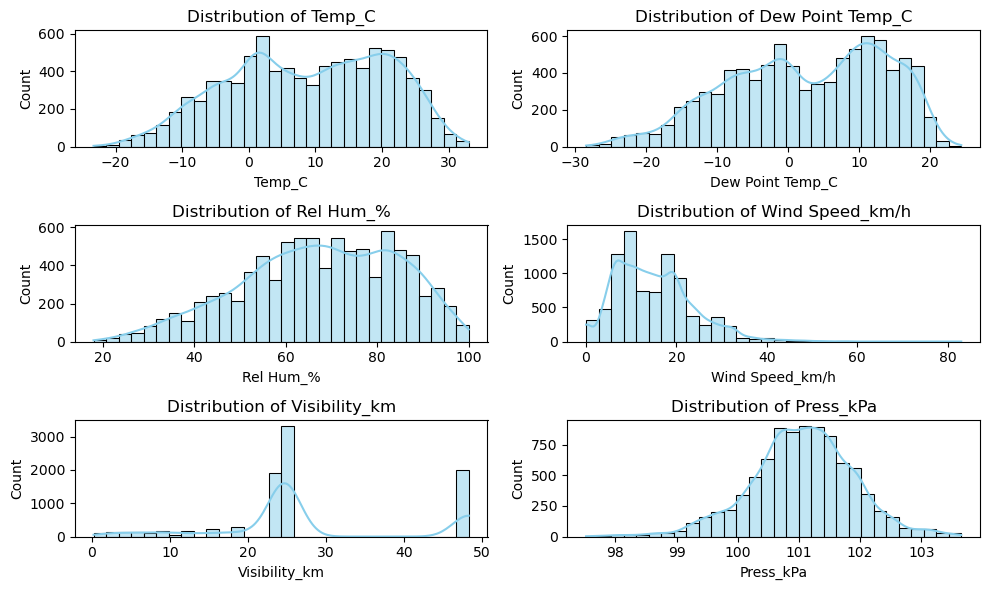

In [7]:
#set numeric columns
numeric_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
                   'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']


# Create histograms
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### 3.2 Time Series Graphs

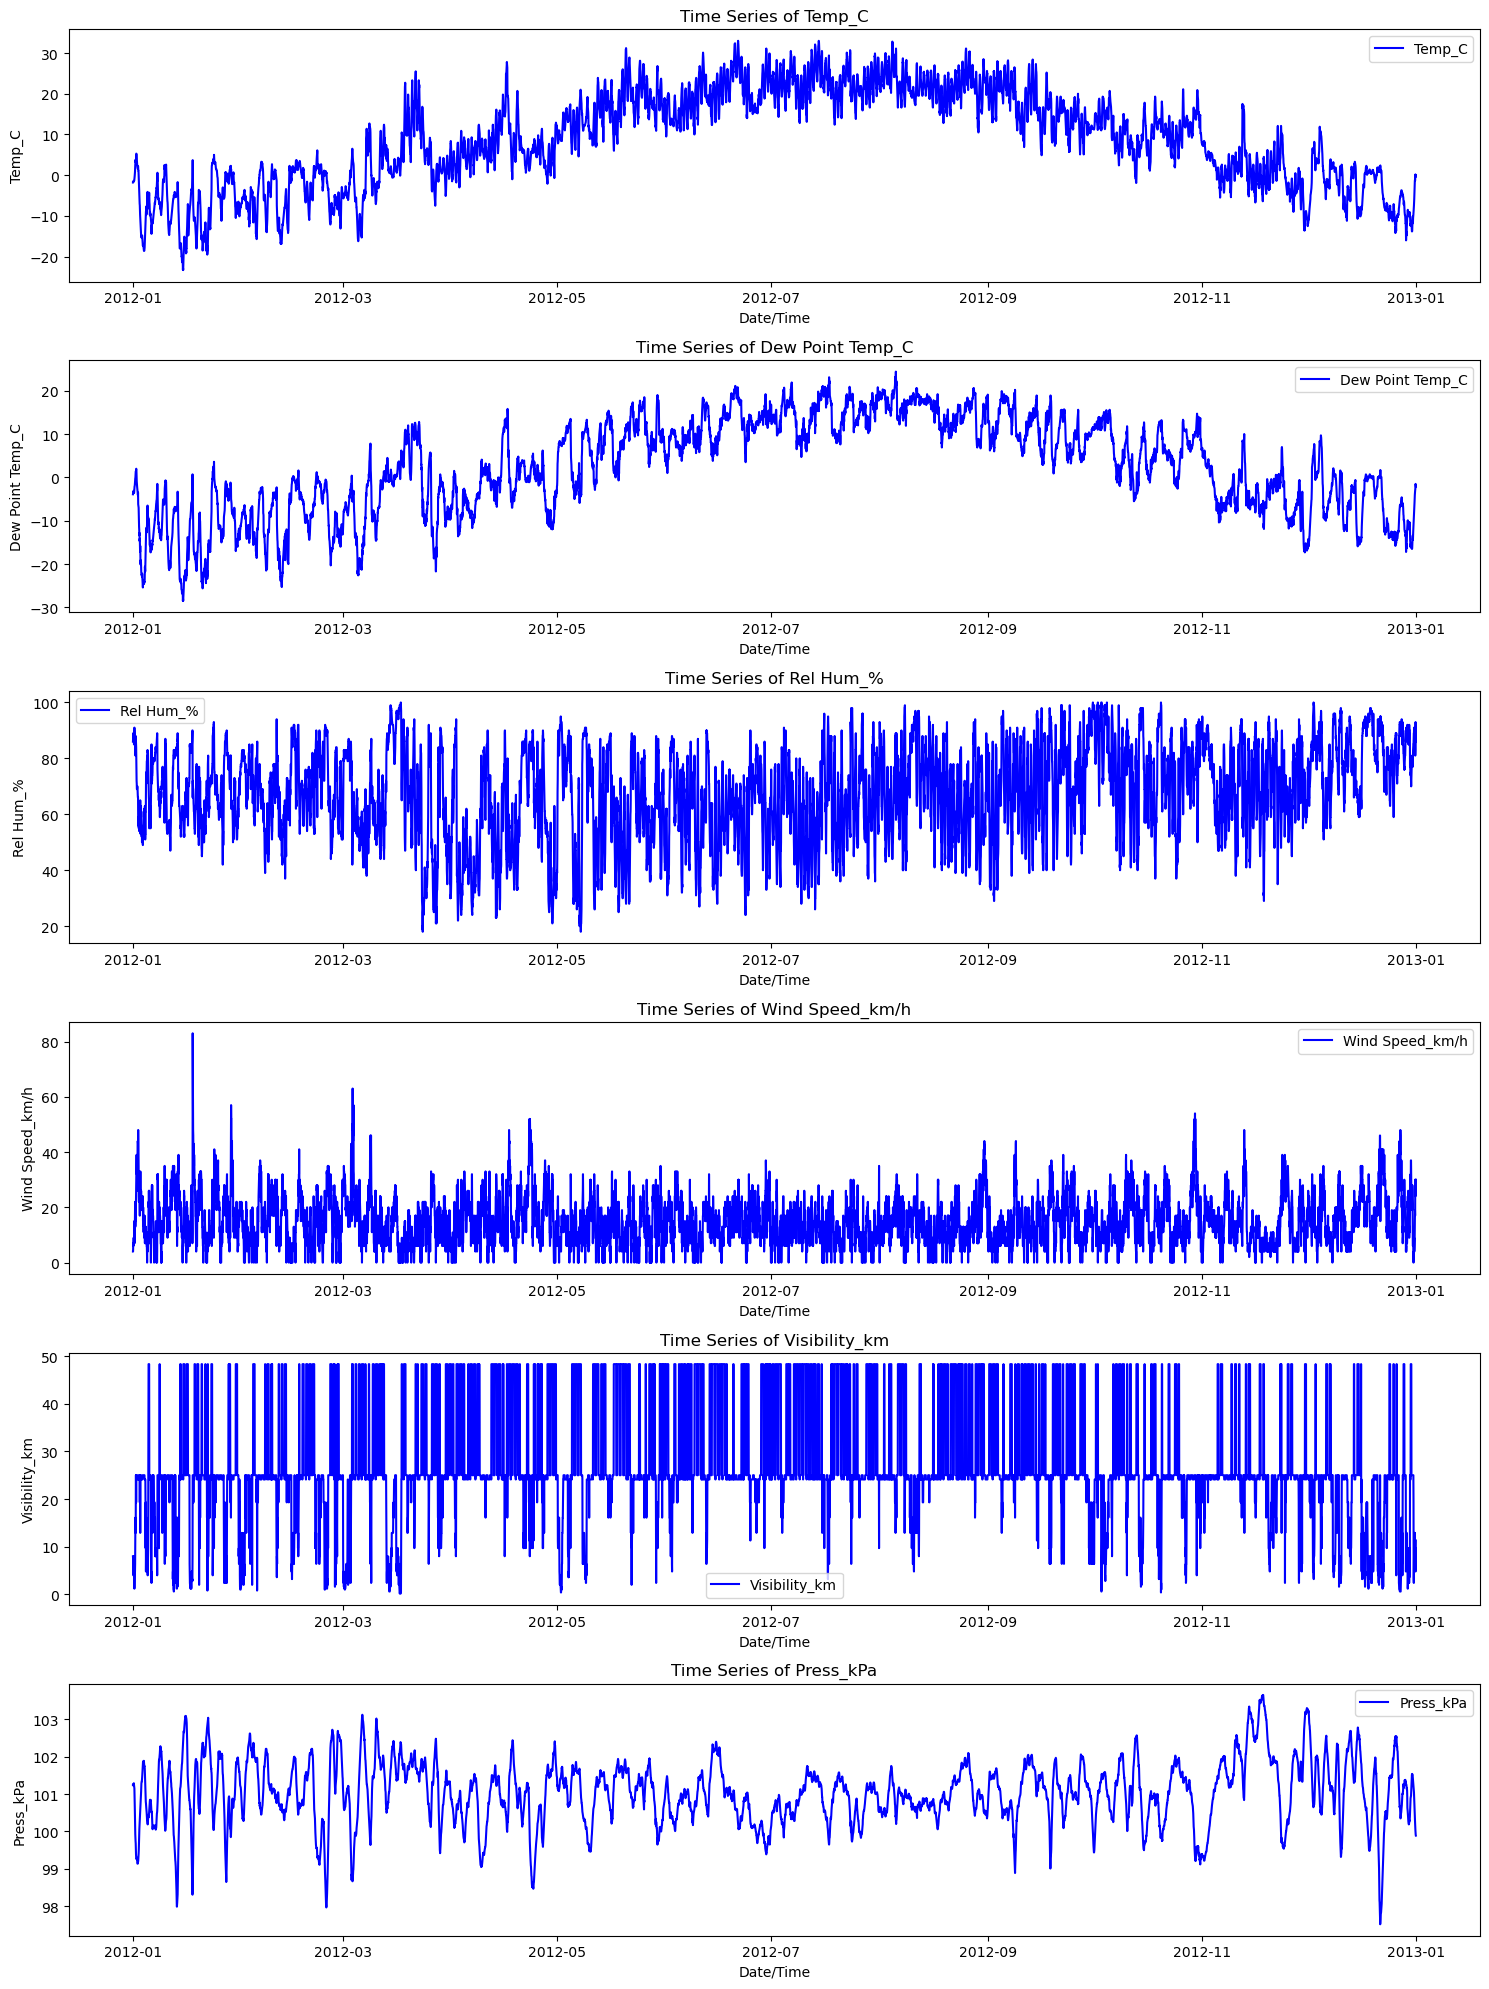

In [8]:
#convert date time to date time
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


#set date/time as index
df.set_index('Date/Time', inplace=True)

#create numeric columns
numeric_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
                   'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Create time series plots
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 1, i)
    plt.plot(df.index, df[column], label=column, color='blue')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date/Time')
    plt.ylabel(column)
    plt.legend()
plt.tight_layout()
plt.show()

- Temperature increases over time similar to humidity as the months continue

- Anomalies are present in visibility and they arise because of the negative numbers present

### 3.3 Correlation

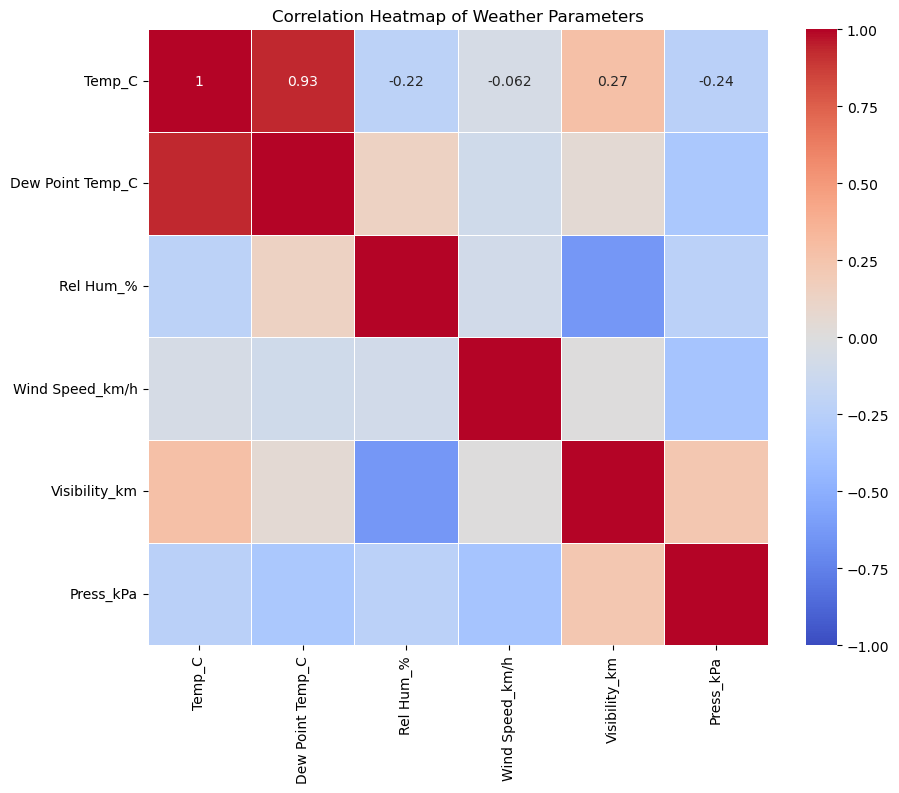

In [9]:
#create numeric columns
numeric_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
                   'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

#calculate correlation
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Weather Parameters')
plt.show()

### 4. Insights and Conclusions

1. Temperature and Dew Point Relationship: There is a strong positive correlation between temperature and dew point temperature, suggesting that as the temperature rises, the dew point temperature also tends to increase. This indicates a potential relationship between these two weather parameters that could be explored further for predicting humidity levels.

2. Humidity and Temperature: The relative humidity shows a negative correlation with temperature, which is expected as higher temperatures often result in lower relative humidity. This relationship is critical for understanding how temperature variations can affect perceived weather conditions.

3. Wind Speed and Pressure: The correlation between wind speed and atmospheric pressure is weak, implying that these factors might be influenced by other variables or that their relationship is not linear. This might require further exploration with additional data or advanced modeling techniques.

4. Visibility: Visibility has a moderate positive correlation with pressure, indicating that higher pressure might be associated with clearer skies and better visibility. This could be useful for forecasting purposes.

### 5. Recommendations for Further Analysis


1. The correlations identified suggest potential relationships between variables. Building predictive models using these variables could provide insights into how they interact in more complex scenarios. For example, using temperature and dew point to predict relative humidity or visibility.

2. Explore creating new features that might capture more complex relationships. For example, calculating the difference between temperature and dew point as a feature, which could be a better predictor of relative humidity.

3. Conduct a deeper analysis to identify and investigate outliers in the dataset. These outliers could represent unusual weather events that might be of interest for further study.